IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      91.0 -0.039879   0.010033    1.805451   0.107706         97.0   
1      40.0 -0.030938   0.020073   -0.117796   0.144840        106.0   
2      15.0 -0.039631   0.027177    1.477348   0.169334         82.0   
3      50.0 -0.043329   0.025471    1.734129   0.165180         91.0   
4      49.0 -0.044742   0.016451   -0.497214   0.135688        129.0   
...     ...       ...        ...         ...        ...          ...   
1344   33.0 -0.023366   0.018031    4.069613   0.136124          0.0   
1345   77.0 -0.053445   0.025716   -0.916725   0.168855          0.0   
1346   24.0  0.006228   0.007536   -0.449010   0.086919          0.0   
1347   34.0 -0.054574   0.006083   -0.027517   0.095108          0.0   
1348   14.0  0.026353   0.048001    3.130716   0.220372         70.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            74.0    6.004126    5.246526 -0.010607  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.039879   0.010033    1.805451   0.107706         97.0         74.0   
1    -0.030938   0.020073   -0.117796   0.144840        106.0         81.0   
2    -0.039631   0.027177    1.477348   0.169334         82.0         81.0   
3    -0.043329   0.025471    1.734129   0.165180         91.0          0.0   
4    -0.044742   0.016451   -0.497214   0.135688        129.0        101.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.023366   0.018031    4.069613   0.136124          0.0         94.0   
1345 -0.053445   0.025716   -0.916725   0.168855          0.0         92.0   
1346  0.006228   0.007536   -0.449010   0.086919          0.0         67.0   
1347 -0.054574   0.006083   -0.027517   0.095108          0.0        109.0   
1348  0.026353   0.048001    3.130716   0.220372         70.0         89.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.006681   0.011638    2.468199   0.107945         61.0         81.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    4.592302    3.707692  0.063189   0.011138  ...       9350.176017   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.501276          0.729223          -0.673024          3.603645   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               103.0               101.0          17.495895   

     amp2(Curr(ESC_5))  Guasto  
340           4.749357       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.039879   0.010033    1.805451   0.107706         97.0         74.0   
1    -0.030938   0.020073   -0.117796   0.144840        106.0         81.0   
2    -0.039631   0.027177    1.477348   0.169334         82.0         81.0   
3    -0.043329   0.025471    1.734129   0.165180         91.0          0.0   
4    -0.044742   0.016451   -0.497214   0.135688        129.0        101.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.023366   0.018031    4.069613   0.136124          0.0         94.0   
1345 -0.053445   0.025716   -0.916725   0.168855          0.0         92.0   
1346  0.006228   0.007536   -0.449010   0.086919          0.0         67.0   
1347 -0.054574   0.006083   -0.027517   0.095108          0.0        109.0   
1348  0.026353   0.048001    3.130716   0.220372         70.0         89.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.039879   0.010033    1.805451   0.107706    97.000000    74.000000   
1    -0.030938   0.020073   -0.117796   0.144840   106.000000    81.000000   
2    -0.039631   0.027177    1.477348   0.169334    82.000000    81.000000   
3    -0.043329   0.025471    1.734129   0.165180    91.000000     0.000000   
4    -0.044742   0.016451   -0.497214   0.135688   129.000000   101.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.140941   0.040215   -1.492854   0.244906    91.000000    90.000000   
1619  0.003253   0.007398   -0.400938   0.085967     0.000000    99.363410   
1620  0.000942   0.007073   -0.277213   0.084010     0.000000   112.583987   
1621  0.006146   0.007539   -0.450054   0.086932     0.000000    74.638258   
1622  0.009423   0.007579   -0.461547   0.087446    69.305792    86.223168   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000001143A089120>)
[ True False False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

         Input_Features   F_Score
34           kurt(AccY)  5.361467
28          freq1(AccX)  3.508053
12          freq1(GyrY)  3.125657
11            RMS(GyrY)  2.890015
9             var(GyrY)  2.703390
153    kurt(RPM(ESC_5))  2.654031
14           amp1(GyrY)  2.453580
93    freq2(RPM(ESC_1))  2.356997
92    freq1(RPM(ESC_1))  2.338325
159    var(Curr(ESC_5))  2.258463
104      <>(RPM(ESC_2))  2.060606
8              <>(GyrY)  1.847947
107     RMS(RPM(ESC_2))  1.727372
22           amp1(GyrZ)  1.712051
78     amp1(RPM(ESC_0))  1.707358
152     var(RPM(ESC_5))  1.687763
32             <>(AccY)  1.572472
62          amp1(Pitch)  1.309342
30           amp1(AccX)  1.116870
76    freq1(RPM(ESC_0))  1.041010
80      <>(Curr(ESC_0))  1.029419
4           freq1(GyrX)  0.997204
17            var(GyrZ)  0.967211
77    freq2(RPM(ESC_0))  0.916189
57           var(Pitch)  0.916029
156    amp1(RPM(ESC_5))  0.751249
81     var(Curr(ESC_0))  0.710928
19            RMS(GyrZ)  0.698574
97     var(Cur

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[1, 2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
0    -0.039879    97.000000 -0.010607   0.005740   0.076417   108.000000   
1    -0.030938   106.000000  0.015118   0.006154   0.079795     0.000000   
2    -0.039631    82.000000 -0.014334   0.008842   0.094990   108.000000   
3    -0.043329    91.000000 -0.003756   0.009673   0.098299     0.000000   
4    -0.044742   129.000000  0.001392   0.026771   0.163419     0.000000   
...        ...          ...       ...        ...        ...          ...   
1618 -0.140941    91.000000  0.027213   0.008803   0.097578    95.615842   
1619  0.003253     0.000000  0.015115   0.005682   0.076784   111.909771   
1620  0.000942     0.000000  0.013875   0.005357   0.074408   117.239992   
1621  0.006146     0.000000  0.017072   0.005804   0.077973    81.769852   
1622  0.009423    69.305792  0.021032   0.005610   0.077695    84.983393   

      amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
0       7.

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  \
340 -0.006681         61.0  0.063189   0.011138   0.122889         98.0   

     amp1(GyrY)  amp2(GyrY)  var(GyrZ)  kurt(GyrZ)  ...  RMS(RPM(ESC_2))  \
340    1.944989    1.720632   0.004696   -1.450479  ...      5477.373178   

     var(Curr(ESC_2))  freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340          1.116055               31.0               32.0           -0.9893   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  <>(Curr(ESC_5))  \
340     1.088465e+06         -1.104447      21355.349421         3.501276   

     var(Curr(ESC_5))  
340          0.729223  

[1 rows x 40 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
0    -0.039879    97.000000 -0.010607   0.004100   -1.187547   0.107243   
1    -0.030938   106.000000  0.015118   0.012824   -1.279692   0.189260   
2    -0.039631    82.000000 -0.014334   0.007024   -1.081857   0.165208   
3    -0.043329    91.000000 -0.003756   0.007589   -1.320502   0.158045   
4    -0.044742   129.000000  0.001392   0.016530   -1.285798   0.186881   
...        ...          ...       ...        ...         ...        ...   
1618 -0.140941    91.000000  0.027213   0.005527   -1.128131   0.150952   
1619  0.003253     0.000000  0.015115   0.005771   -0.907170   0.158760   
1620  0.000942     0.000000  0.013875   0.005551   -0.856073   0.155125   
1621  0.006146     0.000000  0.017072   0.005892   -0.911817   0.161545   
1622  0.009423    69.305792  0.021032   0.005973   -0.888402   0.164276   

      amp1(GyrZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
0       5.173907          

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  RMS(GyrZ)  \
340 -0.006681         61.0  0.063189   0.004696   -1.450479   0.109753   

     amp1(GyrZ)  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
340    1.170367          0.492588          18.971082       5352.9375   

     var(Curr(ESC_2))  kurt(RPM(ESC_4))  
340          1.116055           -0.9893  


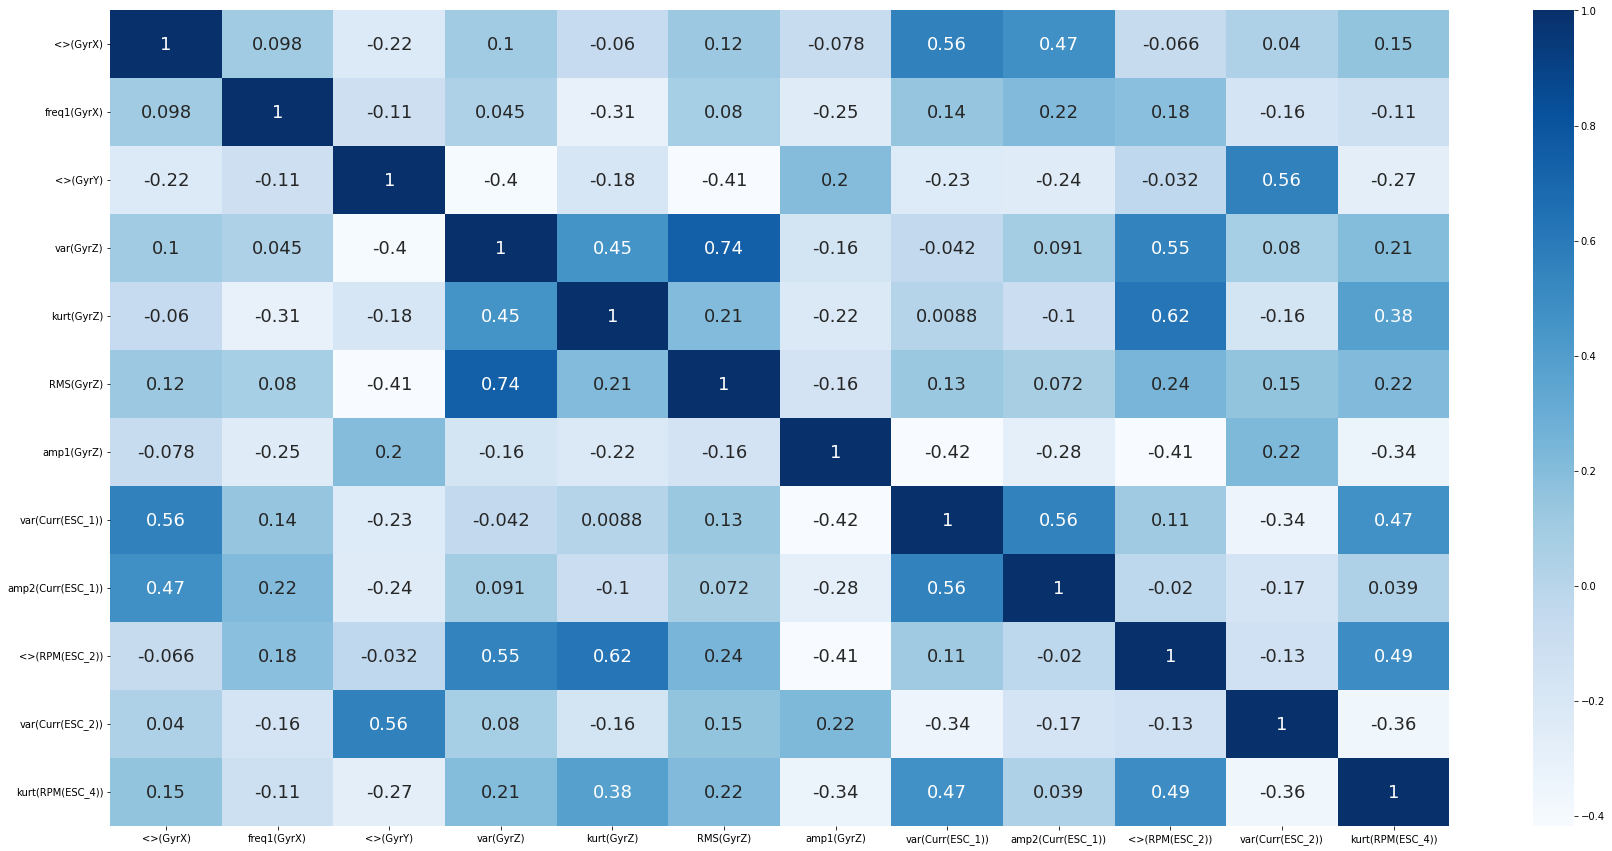

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 12)
(325, 12)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy"),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.61538462 0.64230769 0.72692308 0.72200772 0.65250965]
Accuracy: 0.68 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64


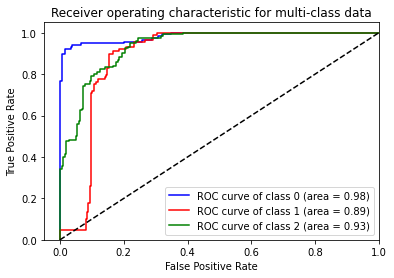

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


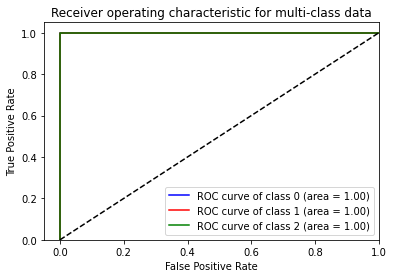

----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> RandomForestClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


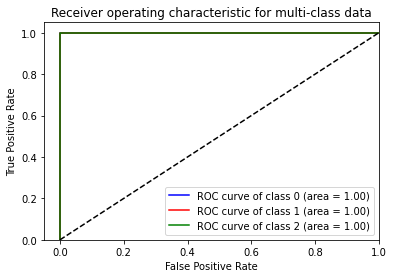

----------------------------------------------------
Cross-Validation: [1.         1.         0.99615385 1.         1.        ]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


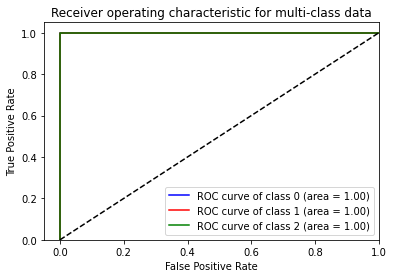

----------------------------------------------------
Cross-Validation: [1.         0.99615385 1.         0.996139   1.        ]
Accuracy: 1.0 	 ---> AdaBoostClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


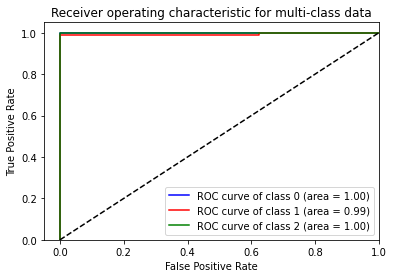

----------------------------------------------------
Cross-Validation: [0.98846154 0.97692308 0.97307692 0.98455598 0.99227799]
Accuracy: 1.0 	 ---> LinearDiscriminantAnalysis 
Test: 1    1
Name: Guasto_test, dtype: int64


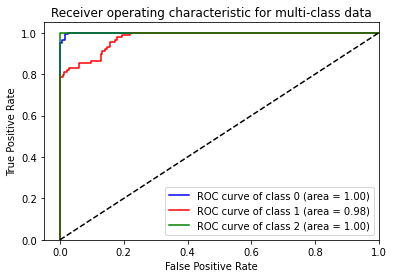

----------------------------------------------------
Cross-Validation: [0.61153846 0.68076923 0.64230769 0.64864865 0.67181467]
Accuracy: 0.62 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64


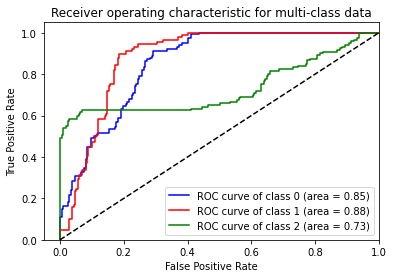

----------------------------------------------------
Cross-Validation: [0.51153846 0.32692308 0.38846154 0.33976834 0.50965251]
Accuracy: 0.35 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64


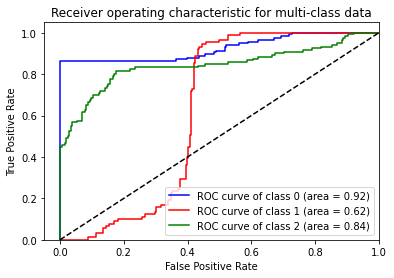

----------------------------------------------------
Cross-Validation: [0.45769231 0.32307692 0.35       0.34749035 0.34749035]
Accuracy: 0.52 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64


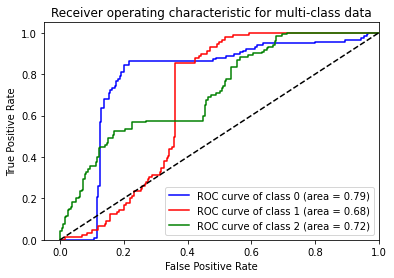

----------------------------------------------------


In [23]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) |(j == 7):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

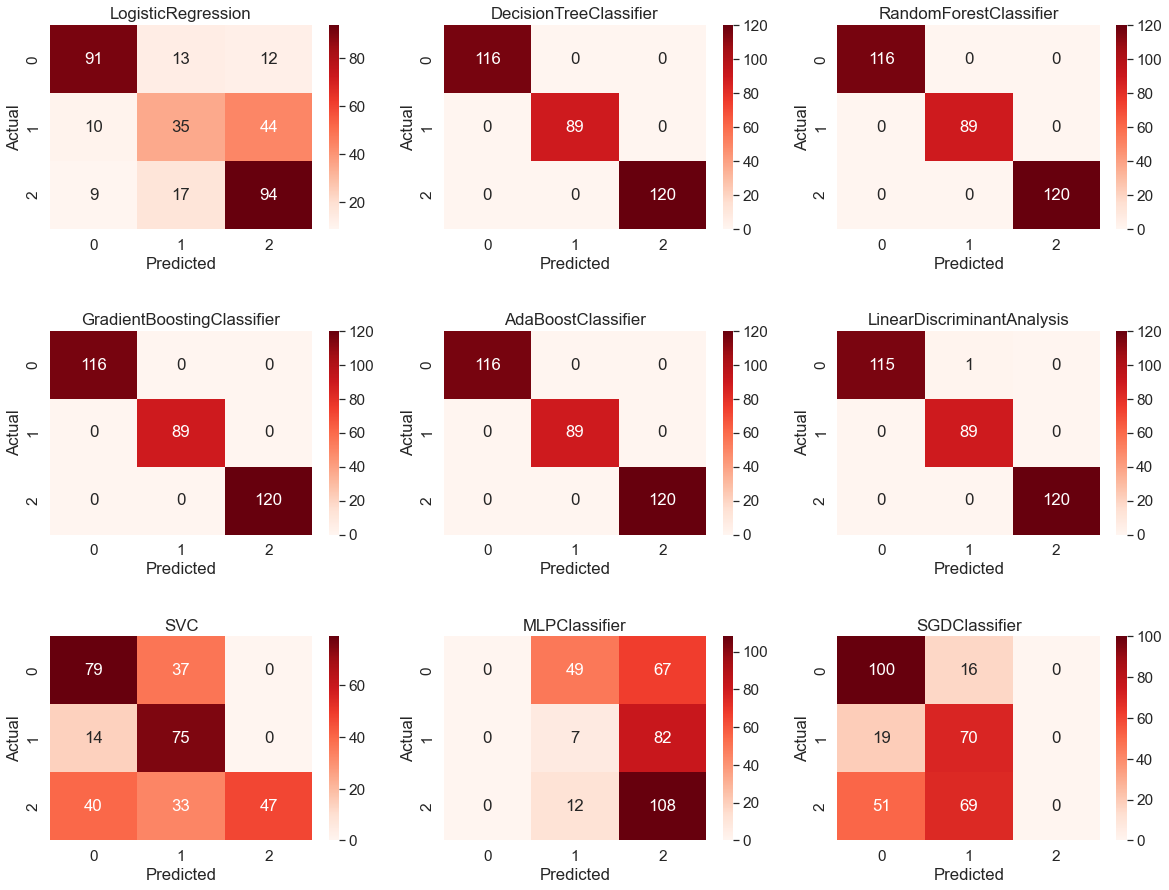

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

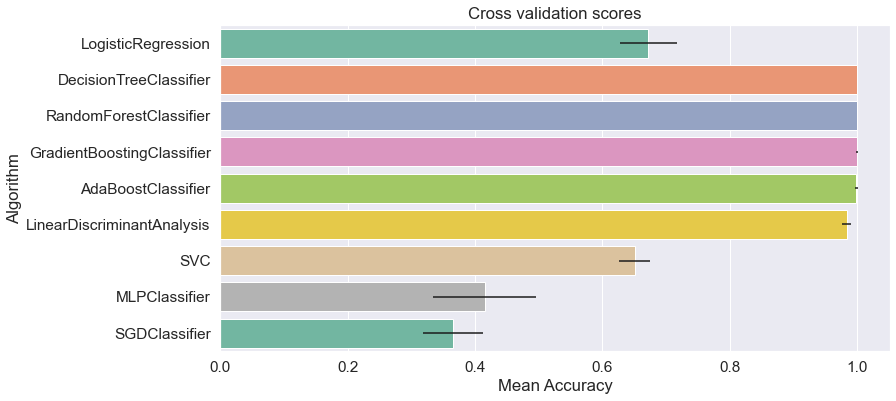

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       116
           1       0.54      0.39      0.45        89
           2       0.63      0.78      0.70       120

    accuracy                           0.68       325
   macro avg       0.66      0.65      0.65       325
weighted avg       0.67      0.68      0.67       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00       120

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      